# Handwritten number recognition

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

### Loading the data 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Reshape the data to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model 

In [6]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 204s 215ms/step - loss: 0.2120 - accuracy: 0.9355 - val_loss: 0.0504 - val_accuracy: 0.9833
Epoch 2/10
938/938 [==============================] - 192s 205ms/step - loss: 0.0836 - accuracy: 0.9750 - val_loss: 0.0353 - val_accuracy: 0.9878
Epoch 3/10
938/938 [==============================] - 173s 184ms/step - loss: 0.0638 - accuracy: 0.9802 - val_loss: 0.0344 - val_accuracy: 0.9884
Epoch 4/10
938/938 [==============================] - 146s 155ms/step - loss: 0.0515 - accuracy: 0.9843 - val_loss: 0.0316 - val_accuracy: 0.9901
Epoch 5/10
938/938 [==============================] - 151s 161ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0304 - val_accuracy: 0.9913
Epoch 6/10
938/938 [==============================] - 159s 169ms/step - loss: 0.0371 - accuracy: 0.9879 - val_loss: 0.0276 - val_accuracy: 0.9910
Epoch 7/10
938/938 [==============================] - 155s 166ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0313 -

### Model Evaluation

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030999664217233658
Test accuracy: 0.9905999898910522


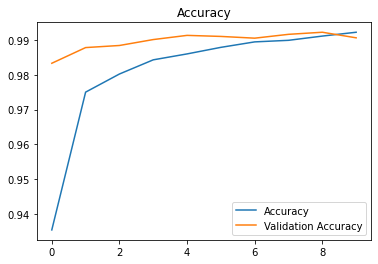

In [8]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
plt.plot( hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

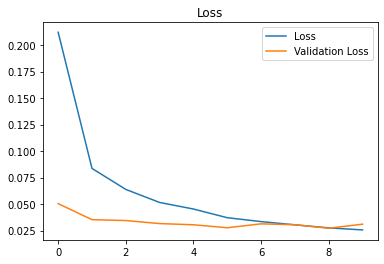

In [9]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [10]:
model.save('handwritten_num_recognition_model.h5')

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
model = load_model('handwritten_num_recognition_model.h5')

In [12]:
def predict_img(imd_addr):
    img_path = imd_addr
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the pixel values to be in the range [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    predictions = model.predict(img_array)
    predicted_digit = np.argmax(predictions)

    print(f'Predicted Digit: {predicted_digit}')

In [13]:
print(predict_img('image0.png'))

1/1 [==============================] - 0s 345ms/step
Predicted Digit: 0
None


In [19]:
print(predict_img('image2.png'))

1/1 [==============================] - 0s 31ms/step
Predicted Digit: 2
None
